In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [2]:
thetaset = np.load('thetaset.npy')
saddleset = np.load('saddleset.npy')
rotangs = np.load('rotangs.npy')
alphabeta = np.load('alphabeta.npy') #Note the need to multiply 0.5 to the values in the loaded alphabeta
Evs = np.load('Evs.npy')
gamma,kappa = np.load('gammakappa.npy') #No need to multiply any combinatorial factors here
BWset = np.load('BWset.npy')

ival = 4 #Number from 0-8 
Ev = Evs[ival]
thetai = thetaset[ival] * IN_RADIAN
rotang = rotangs[ival][0] * IN_RADIAN
alpha,beta = 0.5*alphabeta[ival] #Note the need to multiply 0.5 to the values in the loaded alphabeta
kx0,ky0 = saddleset[ival]

### I want the KDE plot of the entire spectrum

0.8947544953986944


Text(0.5, 1.0, '$\\theta$ = 1.0 degrees, Ev =  0.00018')

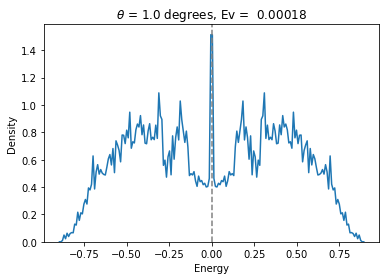

In [3]:
# X = np.linspace(-0.055,0.055,150)
# Y = np.linspace(-0.055,0.055,150)
X = np.linspace(-0.1,0.1,500)
Y = np.linspace(-0.1,0.1,500)
padding = 0.01
#X = np.linspace(kx0-padding,kx0+padding,120)
#Y = np.linspace(ky0-padding,ky0+padding,120)
Z = [[generate_spectrum_Twisted_graphene_single_point(vFpar, wpar, thetai, kx_fixed, ky_fixed, symmetric=True) for kx_fixed in X] 
         for ky_fixed in Y]
Z = np.array(Z)
fig,ax = plt.subplots()
ser = pd.Series(Z.flatten())
print(np.amax(Z))
#sns.kdeplot(ser,ax=ax, bw_adjust=.01, clip = (0,np.amax(Z)))
sns.kdeplot(ser,ax=ax, bw_adjust=.001)
ax.set_xlabel('Energy')
ax.axvline(x = Ev, color = 'grey', ls = '--')
title_str = '$\\theta$ = ' + str(int(thetaset[ival]*1000)/1000) + ' degrees, Ev =  ' + str(int(Ev*100000)/100000)  
ax.set_title(title_str)

0.3823135514573938


Text(0.5, 1.0, '$\\theta$ = 1.0 degrees, Ev =  0.00018')

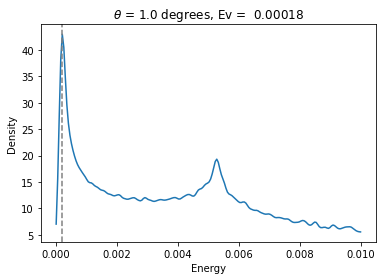

In [6]:
Z = [[generate_spectrum_Twisted_graphene_single_point(vFpar, wpar, thetai, kx_fixed, ky_fixed, symmetric=True)[4] for kx_fixed in X] 
         for ky_fixed in Y]
Zlow = np.array(Z)
fig,ax = plt.subplots()
ser = pd.Series(Zlow.flatten())
print(np.amax(Zlow))
sns.kdeplot(ser,ax=ax, bw_adjust=.01, clip = (0,0.01))
#sns.kdeplot(ser,ax=ax, bw_adjust=.01)
ax.set_xlabel('Energy')
ax.axvline(x = Ev, color = 'grey', ls = '--')
title_str = '$\\theta$ = ' + str(int(thetaset[ival]*1000)/1000) + ' degrees, Ev =  ' + str(int(Ev*100000)/100000)  
ax.set_title(title_str)

AttributeError: 'list' object has no attribute 'flatten'

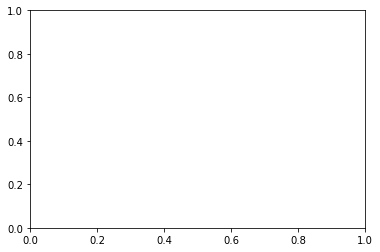

In [5]:
fig,ax = plt.subplots()
ser = pd.Series(Z.flatten())
print(np.amax(Z))
sns.kdeplot(ser,ax=ax, bw_adjust=.01, clip = (0.1,0.2))
#sns.kdeplot(ser,ax=ax, bw_adjust=.001)